# Statistical Analysis of Runs

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import rebound
from rebound import hash as h
import math

G = 6.67408*10**(-11)   # gravitational constant
Mearth = 5.9722*10**24  # kg
Rearth = 6.371*10**6  # meters
Msun = 1.98911*10**30 # kg
Rsun = 6.95*10**8 # meters
Mjup = 1.898*10**27  # kg
Rjup = 7.1492*10**7 # meters
year = 365.25*24*60*60  # years in seconds
AU = (G*Msun*(year**2)/(4.*np.pi**2))**(1./3.)  # meters

# n plots for different starting multiplicities
# tweaks for getting more inner collisions: smaller K, maybe move outer system out??
# bump up self interactions between inner system and lower effects from the outer system



In [2]:
# reading in data from runs

bee = []
for i in range(100):
    try:
        with (open("/home/orioncfoo/Hot Neptune Project/1015 Final Parameters Run 6/orbitalelementshash_" + str(i)+".pickle", "rb")) as openfile:
            bee.append(pickle.load(openfile))
    except:
        print("multiplicity_" + str(i)+".pickle")
        print("run not finished yet!")
        
    try:
        with (open("/home/orioncfoo/Hot Neptune Project/1019 Final Parameters Run 7/orbitalelementshash_" + str(i)+".pickle", "rb")) as openfile:
            bee.append(pickle.load(openfile))
    except:
        print("multiplicity_" + str(i)+".pickle")
        print("run not finished yet!")
        
    try:
        with (open("/home/orioncfoo/Hot Neptune Project/1021 Final Parameters Run 8/orbitalelementshash_" + str(i)+".pickle", "rb")) as openfile:
            bee.append(pickle.load(openfile))
    except:
        print("multiplicity_" + str(i)+".pickle")
        print("run not finished yet!")
        
    try:
        with (open("/home/orioncfoo/Hot Neptune Project/1103 Final Parameters Run 9/orbitalelementshash_" + str(i)+".pickle", "rb")) as openfile:
            bee.append(pickle.load(openfile))
    except:
        print("multiplicity_" + str(i)+".pickle")
        print("run not finished yet!")
len(bee)

400

In [5]:
print(bee)

[{730930102: [array([[1.00000001e+04, 2.00000002e+04, 3.00000003e+04, ...,
        9.97000010e+06, 9.98000010e+06, 9.99000010e+06],
       [5.13747576e-02, 5.13758442e-02, 5.13788305e-02, ...,
        5.13687413e-02, 5.13806125e-02, 5.13786610e-02],
       [5.93440637e-02, 7.48933944e-02, 1.43991978e-02, ...,
        3.89318253e-02, 5.04181751e-02, 5.79261408e-02],
       [2.16461037e-02, 9.65741601e-03, 2.00276392e-02, ...,
        2.11869794e-01, 2.41880494e-01, 2.30239717e-01],
       [2.42411939e-05, 2.42411939e-05, 2.42411939e-05, ...,
        2.42411939e-05, 2.42411939e-05, 2.42411939e-05]]), True], 848020557: [array([[1.00000001e+04, 2.00000002e+04, 3.00000003e+04, ...,
        9.97000010e+06, 9.98000010e+06, 9.99000010e+06],
       [7.00311293e-02, 7.00273417e-02, 7.00142163e-02, ...,
        7.00349201e-02, 7.00127934e-02, 6.99976587e-02],
       [4.41420970e-02, 5.12029592e-02, 9.00454361e-02, ...,
        5.01101411e-02, 9.10181226e-02, 6.52926012e-02],
       [4.51461536e-0

In [3]:
mult_inner = []
mult_outer = []
N_in_final_1 = []
N_in_final_2 = []
N_in_final_3 = []
N_in_final_4 = []
N_in_final_5 = []
N_in_final_6 = []
for elm in bee:
    multiplicity_inner = 0
    multiplicity_outer = 0
    multiplicity_inner_i = 0
    multiplicity_outer_i = 0
    for key in elm:
        if key in [h("inner_p0").value, h("inner_p1").value, h("inner_p2").value, h("inner_p3").value, h("inner_p4").value, h("inner_p5").value]:
            multiplicity_inner_i += 1
            if elm[key][0][1][-5] != 0:
                multiplicity_inner += 1
        elif key in [h("outer_p0").value, h("outer_p1").value, h("outer_p2").value, h("outer_p3").value, h("outer_p4").value, h("outer_p5").value]:
            multiplicity_outer_i += 1
            if elm[key][0][1][-5] != 0:
                multiplicity_outer += 1
    if multiplicity_inner == 1:
        N_in_final_1.append(elm)
    if multiplicity_inner == 2:
        N_in_final_2.append(elm)
    if multiplicity_inner == 3:
        N_in_final_3.append(elm)
    if multiplicity_inner == 4:
        N_in_final_4.append(elm)
    if multiplicity_inner == 5:
        N_in_final_5.append(elm)
    if multiplicity_inner == 6:
        N_in_final_6.append(elm)
    mult_inner.append((multiplicity_inner_i, multiplicity_inner))
    mult_outer.append((multiplicity_outer_i, multiplicity_outer))
mult_inner.sort(key = lambda bob: bob[0])
mult_outer.sort(key = lambda bob: bob[0])
mult_3_inner_i = [tup for tup in mult_inner if tup[0] == 3]
mult_4_inner_i = [tup for tup in mult_inner if tup[0] == 4]
mult_5_inner_i = [tup for tup in mult_inner if tup[0] == 5]
mult_6_inner_i = [tup for tup in mult_inner if tup[0] == 6]

mult_0_inner_f = [tup for tup in mult_inner if tup[1] == 0]
mult_1_inner_f = [tup for tup in mult_inner if tup[1] == 1]
mult_2_inner_f = [tup for tup in mult_inner if tup[1] == 2]
mult_3_inner_f = [tup for tup in mult_inner if tup[1] == 3]
mult_4_inner_f = [tup for tup in mult_inner if tup[1] == 4]
mult_5_inner_f = [tup for tup in mult_inner if tup[1] == 5]
mult_6_inner_f = [tup for tup in mult_inner if tup[1] == 6]

print(mult_3_inner_i)
print(mult_4_inner_i)
print(mult_5_inner_i)
print(mult_6_inner_i)

[(3, 3), (3, 3), (3, 0), (3, 0), (3, 3), (3, 3), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 3), (3, 3), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 1), (3, 3), (3, 3), (3, 0), (3, 3), (3, 0), (3, 0), (3, 0), (3, 1), (3, 1), (3, 3), (3, 0), (3, 3), (3, 3), (3, 0), (3, 3), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 0), (3, 1), (3, 0), (3, 3), (3, 3), (3, 0), (3, 0), (3, 1), (3, 0), (3, 3), (3, 0), (3, 0), (3, 0), (3, 1), (3, 0), (3, 1), (3, 0), (3, 0), (3, 0), (3, 3), (3, 0), (3, 0), (3, 3), (3, 0), (3, 0), (3, 0), (3, 3), (3, 0), (3, 3), (3, 0), (3, 0), (3, 0), (3, 0), (3, 3), (3, 3), (3, 0), (3, 3), (3, 3), (3, 0), (3, 0), (3, 3), (3, 3), (3, 0), (3, 0), (3, 3), (3, 0), (3, 3), (3, 3), (3, 2), (3, 3), (3, 1), (3, 3), (3, 0), (3, 3), (3, 0), (3, 3), (3, 0), (3, 0)]
[(4, 0), (4, 1), (4, 4), (4, 1), (4, 0), (4, 4), (4, 0), (4, 1), (4, 0), (4, 1), (4, 4), (4, 0), (4, 4), (4, 0), (4, 1), (4, 0), (4, 1), (4, 0), (4, 4), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0), (4, 0)

Text(0.5, 1.0, 'Inner System Multiplicites (Initial 6)')

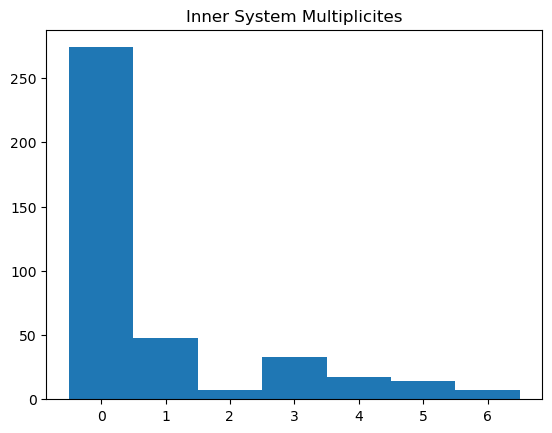

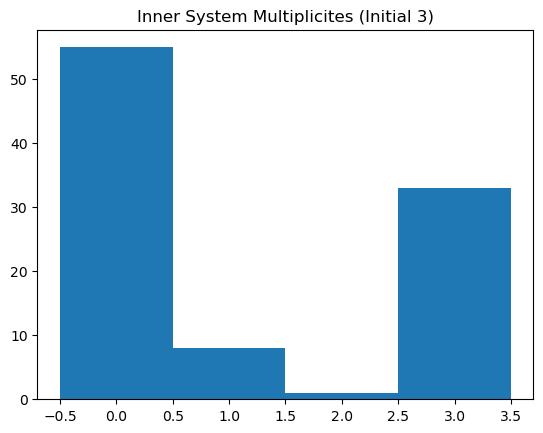

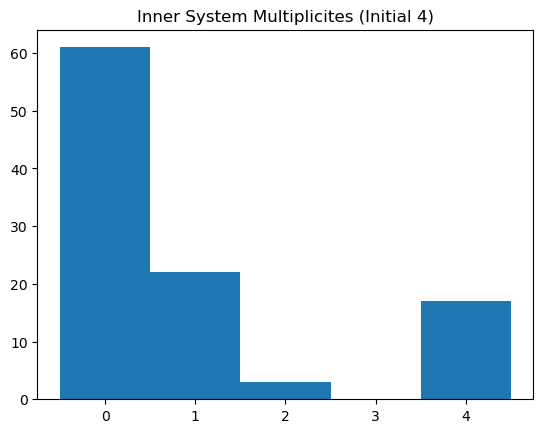

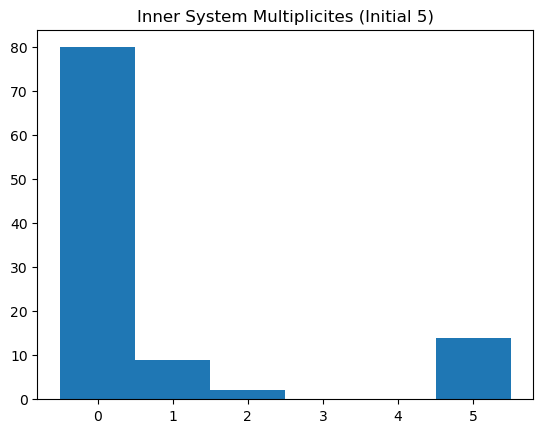

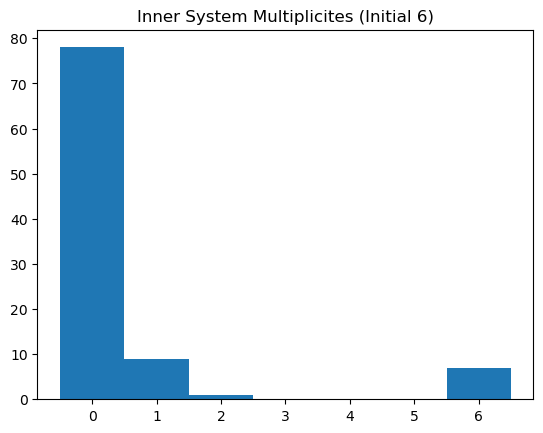

In [4]:
for i in range(len(mult_inner)):
    mult_inner[i] = mult_inner[i][1]
plt.figure()
plt.hist(mult_inner, bins=np.arange(min(mult_inner), (max(mult_inner)+2)), align='left')
plt.title("Inner System Multiplicites")

for i in range(len(mult_3_inner_i)):
    mult_3_inner_i[i] = mult_3_inner_i[i][1]
plt.figure()
plt.hist(mult_3_inner_i, bins=np.arange(min(mult_3_inner_i), (max(mult_3_inner_i)+2)), align='left')
plt.title("Inner System Multiplicites (Initial 3)")
#x_ticks = [-0.5, 0.5, 1.5, 2.5, 3.5]
#x_labels = [0, 1, 2, 3]
#plt.xticks(x_ticks, x_labels)

for i in range(len(mult_4_inner_i)):
    mult_4_inner_i[i] = mult_4_inner_i[i][1]
plt.figure()
plt.hist(mult_4_inner_i, bins=np.arange(min(mult_4_inner_i), (max(mult_4_inner_i)+2)), align='left')
plt.title("Inner System Multiplicites (Initial 4)")
# x_ticks = [0, 1, 2, 3, 4]
# x_labels = [0, 1, 2, 3, 4]
# plt.xticks(x_ticks, x_labels)

for i in range(len(mult_5_inner_i)):
    mult_5_inner_i[i] = mult_5_inner_i[i][1]
plt.figure()
plt.hist(mult_5_inner_i, bins=np.arange(min(mult_5_inner_i), (max(mult_5_inner_i)+2)), align='left')
plt.title("Inner System Multiplicites (Initial 5)")
# x_ticks = [0, 1, 2, 3, 4, 5]
# x_labels = [0, 1, 2, 3, 4, 5]
# plt.xticks(x_ticks, x_labels)

for i in range(len(mult_6_inner_i)):
    mult_6_inner_i[i] = mult_6_inner_i[i][1]
plt.figure()
plt.hist(mult_6_inner_i, bins=np.arange(min(mult_6_inner_i), (max(mult_6_inner_i)+2)), align='left')
plt.title("Inner System Multiplicites (Initial 6)")
# x_ticks = [0, 1, 2, 3, 4, 5, 6]
# x_labels = [0, 1, 2, 3, 4, 5, 6]
# plt.xticks(x_ticks, x_labels)

7


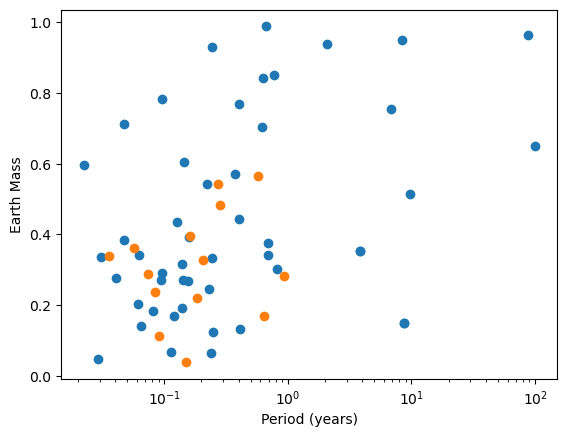

In [5]:
periods = []
masses = []
es = []
smas = []
count = 0
#print(N_in_final_1)
#print(len(N_in_final_1))
for elm in N_in_final_1:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            periods.append(elm[i][0][1][-1]**(3/2))
            masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            es.append(elm[i][0][2][-1])
            smas.append(elm[i][0][1][-1])
            #plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth), c = elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.scatter(smas, es)
#plt.colorbar()
plt.xlabel("Period (years)")
plt.ylabel("Earth Mass")
plt.xscale("log")
#plt.yscale("log")


periods = []
masses = []
es = []
smas = []
count = 0
print(len(N_in_final_2))
for elm in N_in_final_2:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            periods.append(elm[i][0][1][-1]**(3/2))
            masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            es.append(elm[i][0][2][-1])
            smas.append(elm[i][0][1][-1])
            #plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth), c = elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.scatter(smas, es)
#plt.colorbar()
plt.xlabel("Period (years)")
plt.ylabel("Earth Mass")
plt.xscale("log")
#plt.yscale("log")

33


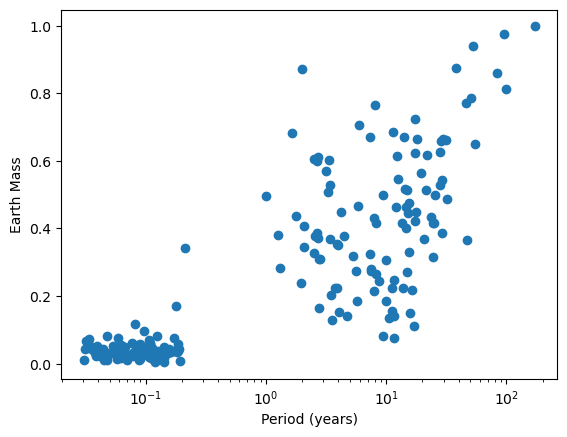

In [6]:
periods = []
masses = []
es = []
smas = []
count = 0
print(len(N_in_final_3))
for elm in N_in_final_3:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            periods.append(elm[i][0][1][-1]**(3/2))
            masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            es.append(elm[i][0][2][-1])
            smas.append(elm[i][0][1][-1])
            #plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth), c = elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.scatter(smas, es)
#plt.colorbar()
plt.xlabel("Period (years)")
plt.ylabel("Earth Mass")
plt.xscale("log")
#plt.yscale("log")

17


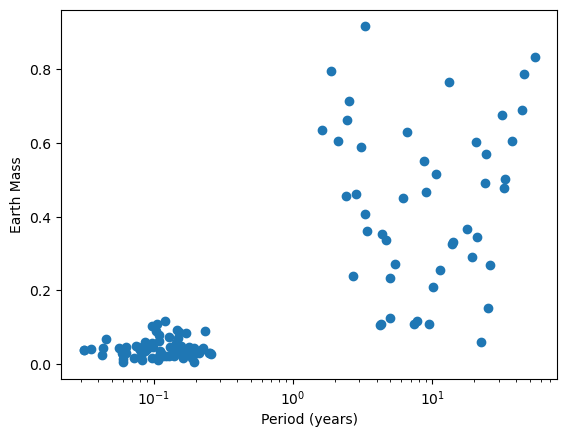

In [7]:
periods = []
masses = []
es = []
smas = []
count = 0
print(len(N_in_final_4))
for elm in N_in_final_4:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            periods.append(elm[i][0][1][-1]**(3/2))
            masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            es.append(elm[i][0][2][-1])
            smas.append(elm[i][0][1][-1])
            #plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth), c = elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.scatter(smas, es)
#plt.colorbar()
plt.xlabel("Period (years)")
plt.ylabel("Earth Mass")
plt.xscale("log")
#plt.yscale("log")

In [8]:
P_arr_for_Rp = np.linspace(0, 16.77, 100) #days
Rp_arr_upp = 10**(-0.31*np.log10(P_arr_for_Rp) + 1.19) #earth radii
Rp_arr_low = 10**(0.67*np.log10(P_arr_for_Rp)  - 0.01)
Rp_arr_low[Rp_arr_low < 2] = 2

P_arr_for_Mp = np.linspace(0, 9.57, 100) 
Mp_arr_upp = (Mjup/Mearth)*10**(-1.14*np.log10(P_arr_for_Mp) + 0.230) #earth mass
Mp_arr_low = (Mjup/Mearth)*10**(0.98*np.log10(P_arr_for_Mp) - 1.85)

/tmp/ipykernel_1222/1238568324.py:2: RuntimeWarning: divide by zero encountered in log10
  Rp_arr_upp = 10**(-0.31*np.log10(P_arr_for_Rp) + 1.19) #earth radii
/tmp/ipykernel_1222/1238568324.py:3: RuntimeWarning: divide by zero encountered in log10
  Rp_arr_low = 10**(0.67*np.log10(P_arr_for_Rp)  - 0.01)
/tmp/ipykernel_1222/1238568324.py:7: RuntimeWarning: divide by zero encountered in log10
  Mp_arr_upp = (Mjup/Mearth)*10**(-1.14*np.log10(P_arr_for_Mp) + 0.230) #earth mass
/tmp/ipykernel_1222/1238568324.py:8: RuntimeWarning: divide by zero encountered in log10
  Mp_arr_low = (Mjup/Mearth)*10**(0.98*np.log10(P_arr_for_Mp) - 1.85)


14


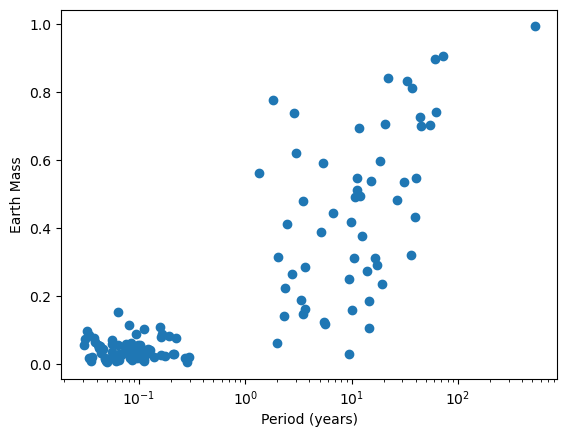

In [9]:
periods = []
masses = []
es = []
smas = []
count = 0
print(len(N_in_final_5))
for elm in N_in_final_5:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            periods.append(elm[i][0][1][-1]**(3/2))
            masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            es.append(elm[i][0][2][-1])
            smas.append(elm[i][0][1][-1])
            #plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth), c = elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])

plt.scatter(smas, es)
#plt.colorbar()
plt.xlabel("Period (years)")
plt.ylabel("Earth Mass")
plt.xscale("log")
#plt.yscale("log")

### Before Integration

In [10]:
smas = []
periods = []
masses = []
for elm in bee:
    for i in elm.keys():
        if i in [h("inner_p0").value, h("inner_p1").value, h("inner_p2").value, h("inner_p3").value, h("inner_p4").value, h("inner_p5").value]:
            smas.append(elm[i][0][1][0])
            periods.append(np.sqrt(((elm[i][0][1][0] * AU) ** 3 * 4 * np.pi ** 2) / (G * 1 * Msun)))
            masses.append(elm[i][0][4][0] * (Msun/Mearth))
smas = np.asarray(smas)
periods = [math.log10(i / (60*60*24)) for i in periods]
masses = [math.log10(i * (Mearth/Mjup)) for i in masses]
x = [-0.5, 1, -0.5]
y = [-2.25, -0.75, 0.6]

for i in range(0, len(x)):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
print(len(periods))
print(len(masses))
plt.scatter(periods, masses)

#plt.xlim(-0.5, 4.0)
#plt.ylim(-3.0, 1.5)

ValueError: math domain error

### Before Tidal Effects

341
341


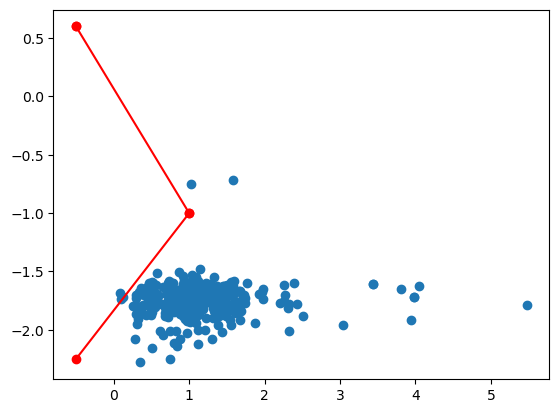

In [11]:
es = []
smas = []
periods = []
masses = []
for elm in bee:
    for i in elm.keys():
        if i in [h("inner_p0").value, h("inner_p1").value, h("inner_p2").value, h("inner_p3").value, h("inner_p4").value, h("inner_p5").value]:
            if elm[i][0][1][-1] != 0:
                es.append(elm[i][0][2][-1])
                smas.append(elm[i][0][1][-1])
                periods.append(np.sqrt(((elm[i][0][1][-1] * AU) ** 3 * 4 * np.pi ** 2) / (G * 1 * Msun)))
                masses.append(elm[i][0][4][-1] * (Msun/Mearth))
smas = np.asarray(smas)
es = np.asarray(es)
periods = [math.log10(i / (60*60*24)) for i in periods]
masses = [math.log10(i * (Mearth/Mjup)) for i in masses]
x = [-0.5, 1, -0.5]
y = [-2.25, -1, 0.6]

for i in range(0, len(x)):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
print(len(periods))
print(len(masses))
plt.scatter(periods, masses)

#plt.xlim(-0.5, 4.0)
#plt.ylim(-3.0, 1.5)

### After Tidal Effects

341
341


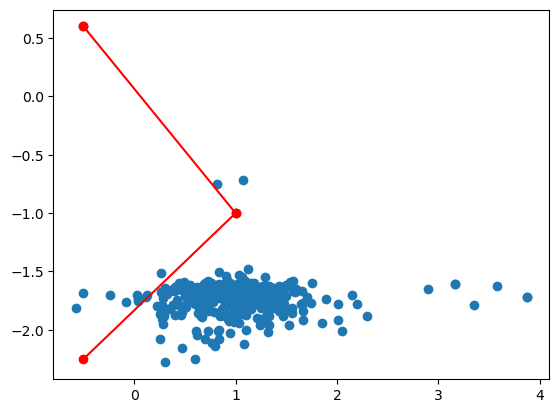

In [12]:
es = []
smas = []
masses = []
periods = []
for elm in bee:
    for i in elm.keys():
        if i in [h("inner_p0").value, h("inner_p1").value, h("inner_p2").value, h("inner_p3").value, h("inner_p4").value, h("inner_p5").value]:
            if elm[i][0][1][-1] != 0:
                es.append(elm[i][0][2][-1])
                smas.append(elm[i][0][1][-1])
                masses.append(elm[i][0][4][-1] * (Msun/Mearth))
smas = np.asarray(smas)
es = np.asarray(es)
periapsis = smas * (1 - es)
for i in periapsis:
    periods.append(np.sqrt(((i * AU) ** 3 * 4 * np.pi ** 2) / (G * 1 * Msun)))
periods = [math.log10(i / (60 * 60 * 24)) for i in periods]
masses = [math.log10(i * (Mearth/Mjup)) for i in masses]
x = [-0.5, 1, -0.5]
y = [-2.25, -1, 0.6]

for i in range(0, len(x)):
    plt.plot(x[i:i+2], y[i:i+2], 'ro-')
print(len(periods))
print(len(masses))
plt.scatter(periods, masses)

#plt.xlim(-0.5, 4.0)
#plt.ylim(-3.0, 1.5)

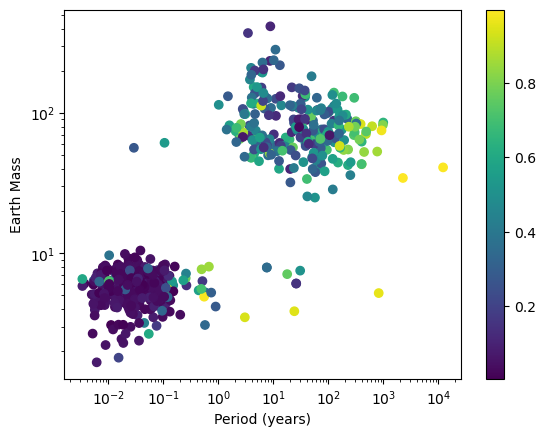

In [13]:
#periods = np.zeros((len(bee), 10))
#masses = np.zeros((len(bee), 10))
periods = []
masses = []
es = []
count = 0
for elm in bee:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            periods.append(elm[i][0][1][-1]**(3/2))
            masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            es.append(elm[i][0][2][-1])
            #plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth), c = elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.scatter(periods, masses, c = es)
plt.colorbar()
plt.xlabel("Period (years)")
plt.ylabel("Earth Mass")
plt.xscale("log")
plt.yscale("log")

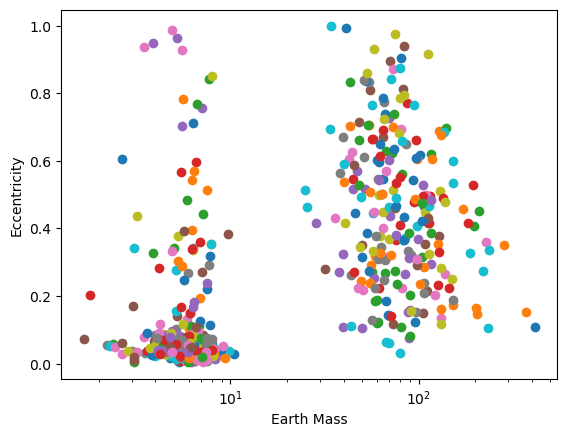

In [14]:
#periods = np.zeros((len(bee), 10))
#masses = np.zeros((len(bee), 10))
count = 0
for elm in bee:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            plt.scatter(elm[i][0][4][-1] * (Msun/Mearth), elm[i][0][2][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.xlabel("Earth Mass")
plt.ylabel("Eccentricity")
plt.xscale("log")

0.06780729531959284
0.08605186426570242
0.10899654115429953
1.0094734352445203
6.816980307984885
0.17803061883993762
0.08118649407898677
0.21091055508674536
0.03065258007525018
0.06668920105327833
0.0887372969613792
0.11716079994803603
4.694429212829143
18.014707224994062
1.785240158559823
7.285133227566071
0.10893261265289117
0.14133623235548437
0.18189541943046522
2.6758931351828554
21.8791328656581
0.08101933619748401
0.10872428217058011
0.14641468603941754
0.19641573694132333
0.1407205206417267
0.4095982739710014
99.56261280020523
0.0634399717443318
0.08658534589978861
0.11342712816659868
0.1491239919722456
3.3159803697462626
32.6685314113028
24.998873005150315
0.064858451686541
2.0907517582708475
0.03187472283102732
0.04242293551173409
0.0564258905114887
0.07515434934974283
0.03877791362611629
0.04999503062505676
0.06440006267815944
0.08322641883092904
0.10742858949777342
2.3760695982476157
11.333813209846767
12.411276319584097
11.829030910482018
0.1101222590092603
0.1456516353699

10.742176817536398
0.06180070374733039
0.08097106706872298
0.10712843828981462
13.464246695264675
27.80125058749213
7.886157077761963
2.778186941459668
0.059410816430170064
0.07893000954252913
0.1048299289205905
15.225356223492694
2.7607123209521713
5.707510546205122
11.626366394672369
0.22223740812817025
0.03582313844608272
0.04764964705120144
0.0633618585409975
0.08426959986456221
0.1121311830849419
73.00177228077047
3.508528102220918
61.872392564550786
12.116483770416282
26.83642347994436
0.05784038505315792
0.0786439079398514
0.10697850027551786
11.215713832738649
2.0576386701570226
51.13211307454973
32.13018434772883
15.497829645489867
15.604222253742918
0.09386746621664403
0.1250610073317539
0.16653309964049307
0.22200289951363222
0.2956119040724813
1.9735150246055413
0.23069507165286252
9.797798972174657
0.03047848304963787
0.041115515813862615
0.055680081923904244
0.07506918579039197
0.10215461834332755
16.78227998774397
3.508929418232432
9.519433693435454
5.153959210508088
54.

Text(0, 0.5, 'Eccentricity')

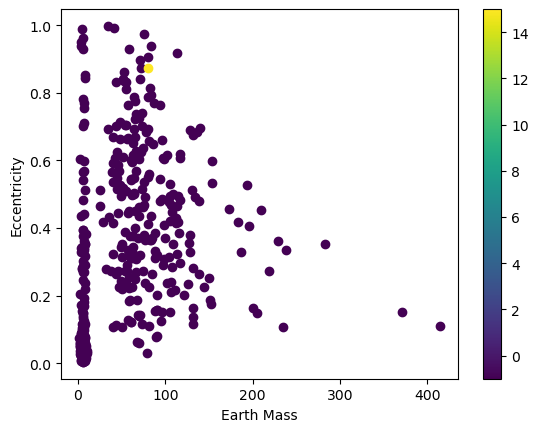

In [15]:
#periods = np.zeros((len(bee), 10))
#masses = np.zeros((len(bee), 10))
count = 0
for elm in bee:
    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            print(elm[i][0][1][-1])
            plt.scatter(elm[i][0][4][-1] * (Msun/Mearth), elm[i][0][2][-1], c = elm[i][0][1][-1])
            #periods[i] = elm[i][0][1][-1]**(3/2)
            #masses.append(elm[i][0][4][-1] * (Msun/Mearth))
            #print(elm[i][0][1][-1])
plt.colorbar()
plt.clim(-1, 15)  # identical to caxis([-4,4]) in MATLAB
plt.xlabel("Earth Mass")
plt.ylabel("Eccentricity")
#plt.xscale("log")

In [ ]:
for elm in bee:
    fig = plt.figure(figsize=(20,10))
    ax = plt.subplot(221)
    ax.set_ylabel("Mass (Earth)")
    ax.set_xlabel("Period (years)")
    ax.set_title("Mass vs. Period")
    #ax.set_yscale("log")
#     plt.scatter(0.005, 9.1) #TOI-969 System b
#     plt.annotate("b", (0.005, 9.1))
#     plt.scatter(4.657534, 3592.347) #TOI-969 System c
#     plt.annotate("c", (4.657534, 3592.347))

    for i in elm.keys():
        if elm[i][0][1][-1] != 0:
            plt.scatter(elm[i][0][1][-1]**(3/2), elm[i][0][4][-1] * (Msun/Mearth))
    fig = plt.figure(figsize=(20,10))
    ax = plt.subplot(221)
    ax.set_xlabel("time")
    ax.set_ylabel("semi-major axis")
    ax.set_title("Semi-Major Axis")
    ax.set_yscale("log")
    #plt.ylim(-1, 10)
    #plt.xlim(0, 2000)
    #print(times)
    count = 1
    for i in elm.keys():
        print(elm[i][0][1][0])
        plt.plot(elm[i][0][0], elm[i][0][1], label = "Planet " + str(count))
        count += 1
    print(" ")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
print("bob)")

# for elm in bee:
    

0.06781815031042099
0.08595635122984638
0.10914678943590882
3.0830893446033025
2.8429942720786934
6.591384373189767
4.941604846221884
7.429408984333026
 
0.04782141771056357
0.049555218983363555
0.15673318725394986
0.08444463882132468
0.08872676764699121
0.10212927796076608
2.286911277450277
4.018614220411595
4.947065505639779
5.787293044360304
6.47336346993868
7.9055423902268585
 
0.035030333320756994
0.04412918044565692
0.08513915415695593
0.06450308939909337
2.872095976354148
3.51388480987888
4.336177801531727
5.1754538674955795
 
0.06234265566701868
0.0771227221685755
0.09538213233121862
0.11822077342276135
0.14716343054551223
0.18189658876514128
4.681782287151533
6.022161768963911
9.113995232359041
7.427101932633869
11.322047667274202
 
0.055090168199828614
0.07339759225413368
0.09774496137649796
0.13027371464978854
0.1734694431945072
3.117434130266934
4.773208738964817
3.4072099788005636
7.323043594293851
8.86116073818314
12.087236583403177
 
0.10599852561033195
0.132004914458865

/tmp/ipykernel_1222/3493992397.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20,10))


0.10914960800233035
0.1410634704783897
0.18196544565063963
4.433831572743982
8.53554902181116
5.2379943575216
12.74101543388118
10.486697339753272
 
0.05052794020097759
0.08713468546243103
0.09879608655801463
0.07437933569100684
0.15746179023270288
0.12110330177678856
2.7151792577221543
3.446630340405883
4.141645145939011
5.1536334233885235
6.300518736733222
7.722561817288041
 
0.03314268952554366
0.04059748329527406
0.07606441721300726
0.05787613299875224
0.08930408234233514
4.824311513119122
9.640422871626377
3.7535275234908867
8.511691438027809
10.429525251649569
12.646422767190849
 
0.08102557334640129
0.10884399622901686
0.1462152986245464
0.1964761942862667
2.8269852809299674
6.852598231350137
3.8002390734382243
6.205393286788145
 
0.07334103544924439
0.09113356219487045
0.11313147251289378
3.6159747454471334
4.772878048169112
6.173298231594617
8.362449916461498
10.189546010462756
11.63682641836377
 
0.0759328191210772
0.09421527348371393
0.1148071134684224
4.593926657462992
6.36

0.072037728590694
0.09741367682721538
0.13184678717729184
0.17834083165781547
6.650621544987006
4.054250483593325
9.725046216699083
10.547222958170059
 
0.032964935619038724
0.03953805206651829
0.04902997632909185
4.120222885756639
4.768000760893397
9.69590995622737
7.029523094622083
6.444383796651866
10.708760400299091
 
0.02462492967088077
0.03074703095743054
0.03817109977463947
0.047531911800695145
0.05928015196684879
0.07376289014012194
2.678961391443533
4.13691682682418
4.060803481550656
6.553078638841696
7.599326173723534
5.792919460300009
 
0.052762361025941874
0.0
0.0
3.423055843465461
3.549321073521477
9.655933696574241
6.4566939785422575
 
0.07107109529767572
0.09457511339416463
0.125852676716249
3.0007955434037386
3.164034586635287
4.91430124544643
6.667324202273864
7.936093431658903
 
0.08189633783266402
0.0387880877744239
0.05535073140549015
0.060716421127401644
5.1508682538703585
4.225134742160392
5.409596477169476
2.7515934824388206
6.640501295315607
 
0.0250550300262848

0.036396599671810824
0.047881323468922474
0.06265534478971749
0.0819842975258199
0.10798697903235267
5.227890795161528
6.420986317524921
7.972990952141488
9.829034246470854
11.992153291265028
 
0.09837983454387747
0.12676924097871023
0.1630969532044928
0.21028665935991192
0.2706184514405849
3.0206368821766922
3.7331917722850947
4.704770854307189
5.777302589107338
 
0.037153227031320096
0.0462122999132966
0.05750727426813122
0.0715341332463483
0.0889568252169509
3.9726329491621146
2.5378861979779006
5.623945416346585
5.031245370757547
 
0.037153227031320096
0.0462122999132966
0.05750727426813122
0.0715341332463483
0.0889568252169509
3.9726329491621146
2.5378861979779006
5.623945416346585
5.031245370757547
 
0.050823332922075706
0.06691805336781075
0.08871920590850063
0.11687896423007399
0.15454026595789191
0.2043515606548411
4.203934566132203
5.466837152444462
7.164230654978227
9.536052586495218
11.917949018528837
 
0.06630182648308167
0.08422383597718908
0.10685185490985437
0.135647292

4.321411858397513
6.461566693347994
7.4716250704010685
8.949276341046076
14.01380354706558
 
0.040645545891147175
0.05128539163557647
0.06468522739017336
0.08161037001590611
0.10300405252411492
3.9419200849679235
4.7520405861812565
5.839633835491629
7.05563324909784
8.560744229257669
 
0.03491694660370754
0.0624117507416323
0.07411068080098215
0.04497755929118256
5.01911934707786
6.188413635718166
11.830068226883764
8.276971144367598
 
0.036574610264499645
0.04863506285642996
0.06469747817488153
0.08602617472108708
0.11453880895970214
4.746178019896971
6.11552215078897
7.9128586593894
9.616833094241901
11.483713932634126
14.354374428030814
 
0.04162955544839762
0.0534679758578853
0.035241916292821134
0.08818716914284927
0.07759772923667703
5.128577438187756
6.012488137247968
6.267716372077705
9.17185894803627
13.904408715674299
12.497099177163062
 
0.10894454459644233
0.13748999914146715
0.17214110333672558
0.21629208988703763
0.2705365254485983
4.1256804493264845
2.9570826136251855
5.